In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score , f1_score, ConfusionMatrixDisplay, classification_report

In [2]:
!gdown 1rQPzACKn3SANJwBuJe_Wzk-B0sEGDRrW

Downloading...
From: https://drive.google.com/uc?id=1rQPzACKn3SANJwBuJe_Wzk-B0sEGDRrW
To: /content/Churn.csv
100% 289k/289k [00:00<00:00, 39.7MB/s]


In [3]:
churn = pd.read_csv("Churn.csv")
churn.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Intl Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [4]:
churn.isna().sum()

Account Length    0
VMail Message     0
Day Mins          0
Eve Mins          0
Night Mins        0
Intl Mins         0
CustServ Calls    0
Churn             0
Intl Plan         0
VMail Plan        0
Day Calls         0
Day Charge        0
Eve Calls         0
Eve Charge        0
Night Calls       0
Night Charge      0
Intl Calls        0
Intl Charge       0
State             0
Area Code         0
Phone             0
dtype: int64

In [5]:
cols = ['Day Mins', 'Eve Mins', 'CustServ Calls', 'Intl Plan','VMail Message']
y = churn["Churn"]
X = churn[cols]
X.shape

(3333, 5)

In [8]:
churn["Churn"].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [10]:
# Train, CV, test split
from sklearn.model_selection import train_test_split
#0.6, 0.2, 0.2 split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

In [11]:
X_train.head()

,Day Mins,Eve Mins,CustServ Calls,Intl Plan,VMail Message
1399,167.6,219.2,4,0,0
360,257.1,312.2,1,1,0
1136,270.3,215.2,1,1,26
2078,131.1,176.2,1,0,0
2011,194.2,193.8,3,0,0


In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
error = []

# Calculating error for K values between 1 and 50

for i in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_val)
    error.append(np.mean(pred_i != y_val))

Text(0, 0.5, 'Mean Error')

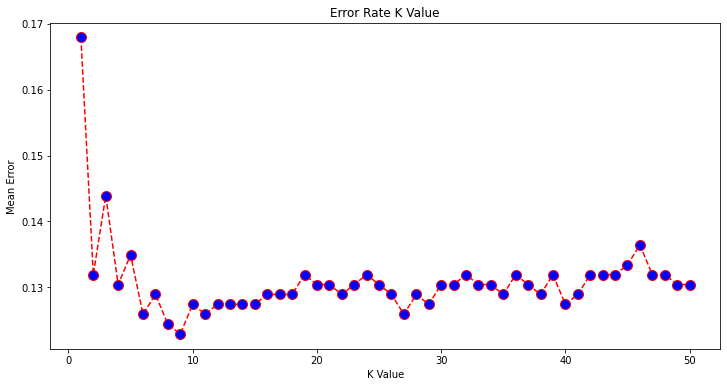

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 51), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [15]:
knn = KNeighborsClassifier(n_neighbors=9,metric='euclidean')

knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [16]:
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

0.9025487256371814

In [17]:
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,index = np.unique(y_test), columns = np.unique(y_test) )

cm_df.head()

,0,1
0,560,6
1,59,42


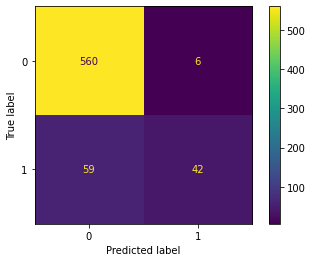

In [18]:
ConfusionMatrixDisplay(cm).plot()

In [19]:
f1_score(y_test, knn.predict(X_test))

0.5637583892617449

In [20]:
recall_score(y_test, knn.predict(X_test))

0.4158415841584158

In [21]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95       566
           1       0.88      0.42      0.56       101

    accuracy                           0.90       667
   macro avg       0.89      0.70      0.75       667
weighted avg       0.90      0.90      0.89       667



# class-Weights

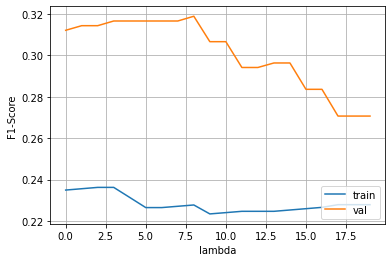

In [22]:
# Hyper-pram tuning without any rebalancing 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score

train_scores = []
val_scores = []
scaler = StandardScaler()
l = 0.01
h = 20.0
d = 1.0

for la in np.arange(l,h,d):
  scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/la))
  scaled_lr.fit(X_train, y_train)
  train_y_pred = scaled_lr.predict(X_train)
  val_y_pred = scaled_lr.predict(X_val)
  train_score = f1_score(y_train, train_y_pred)
  val_score = f1_score(y_val, val_y_pred)
  train_scores.append(train_score)
  val_scores.append(val_score)


# Plotting the f1 scores
plt.figure()
plt.plot(list(np.arange(l,h,d)), train_scores, label="train")
plt.plot(list(np.arange(l,h,d)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("F1-Score")
plt.grid()
plt.show()

In [23]:
f1_score(y_test, scaled_lr.predict(X_test))

0.1875

In [24]:
recall_score(y_test, scaled_lr.predict(X_test))

0.1188118811881188

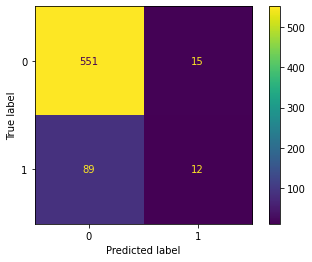

In [25]:
cm = confusion_matrix(y_test, scaled_lr.predict(X_test))
ConfusionMatrixDisplay(cm).plot()

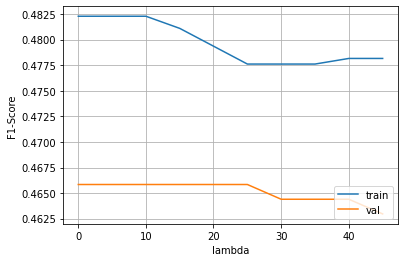

In [26]:
# minority class needs more re-weighting 

# Hyper-pram tuning
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score

train_scores = []
val_scores = []
scaler = StandardScaler()
l = 0.01
h = 50.0
d = 5.0

for la in np.arange(l,h,d):
  scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/la, class_weight={ 0:1, 1:6 }))
  scaled_lr.fit(X_train, y_train)
  train_y_pred = scaled_lr.predict(X_train)
  val_y_pred = scaled_lr.predict(X_val)
  train_score = f1_score(y_train, train_y_pred)
  val_score = f1_score(y_val, val_y_pred)
  train_scores.append(train_score)
  val_scores.append(val_score)

#plotting
plt.figure()
plt.plot(list(np.arange(l,h,d)), train_scores, label="train")
plt.plot(list(np.arange(l,h,d)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("F1-Score")
plt.grid()
plt.show()

In [27]:
f1_score(y_test, scaled_lr.predict(X_test))

0.5114754098360655

In [28]:
recall_score(y_test, scaled_lr.predict(X_test))

0.7722772277227723

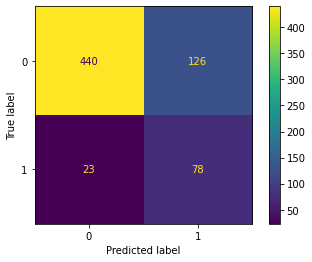

In [29]:
cm = confusion_matrix(y_test, scaled_lr.predict(X_test))
ConfusionMatrixDisplay(cm).plot()

# SMOTE

In [30]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smt = SMOTE()
X_sm, y_sm = smt.fit_resample(X_train, y_train)

print('Resampled dataset shape {}'.format(Counter(y_sm)))

Resampled dataset shape Counter({0: 1718, 1: 1718})


In [31]:
y_train.value_counts()

0    1718
1     281
Name: Churn, dtype: int64

In [32]:
X_sm.shape,y_sm.shape

((3436, 5), (3436,))

In [37]:
y_sm.value_counts()

0    1718
1    1718
Name: Churn, dtype: int64

# kNN

In [38]:
error = []
recalls = []


# Calculating error for K values between 1 and 50

for i in range(1, 101):
    knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn.fit(X_sm, y_sm)
    pred_i = knn.predict(X_val)
    # error.append(np.mean(pred_i != y_val))
    recalls.append(recall_score(y_val, pred_i))

Text(0, 0.5, 'Recall Error')

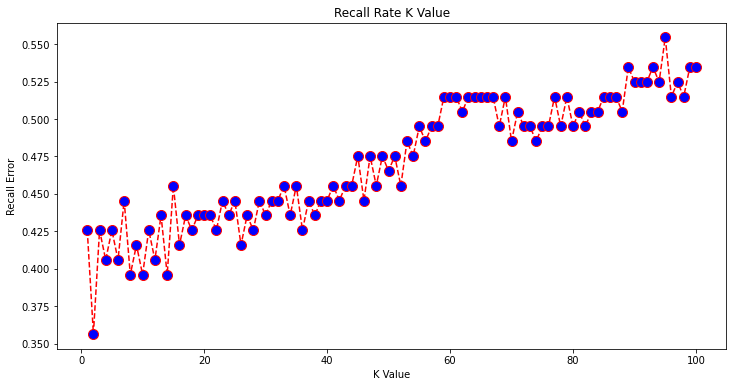

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 101), recalls, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Recall Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Recall Error')

In [40]:
np.argmax(recalls)

94

In [41]:
knn = KNeighborsClassifier(n_neighbors=94,metric='euclidean')

knn.fit(X_sm, y_sm)


KNeighborsClassifier(metric='euclidean', n_neighbors=94)

In [42]:
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

0.7166416791604198

In [43]:
recall_score(y_test, y_pred)

0.6138613861386139

In [44]:
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,index = np.unique(y_test), columns = np.unique(y_test) )

cm_df.head()

,0,1
0,416,150
1,39,62


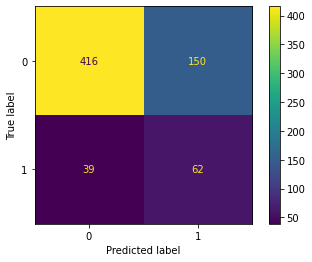

In [45]:
ConfusionMatrixDisplay(cm).plot()

In [46]:
recall_score(y_test, y_pred)

0.6138613861386139